## Machine Learning with Concrete Strength

Concrete strength is affected by factors such as water to cement ratio, raw material quality, the ratio of coarse or fine aggregate, concrete age, concrete compaction, temperature, relative humidity, and other factors during the curing of the concrete. The data includes the following information for 1030 concrete samples.

- **Input variables:**
  - Cement: kg/m$^3$ mixture
  - Blast Furnace Slag: kg/m$^3$ mixture
  - Fly Ash: kg/m$^3$ mixture
  - Water: kg/m$^3$ mixture
  - Superplasticizer: kg/m$^3$ mixture
  - Coarse Aggregate: kg/m$^3$ mixture
  - Fine Aggregate: kg/m$^3$ mixture
  - Age: Day (1~365)
- **Output variable:**
  - Concrete compressive strength: MPa

```python
url = 'http://apmonitor.com/pds/uploads/Main/cement_strength.txt'
```

![Concrete Strength](http://apmonitor.com/pds/uploads/Main/concrete_strength_machine_learning.png)

The full problem statement is on the [Machine Learning for Engineers course website](http://apmonitor.com/pds/index.php/Main/CementStrength).

### Import Packages

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# Import classifier models
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB # Naïve Bayes
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neural_network import MLPClassifier # Neural Network

# Import regression models
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
import statsmodels.api as sm

### Import Data

In [3]:
url = 'http://apmonitor.com/pds/uploads/Main/cement_strength.txt'
data = pd.read_csv(url)
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Pair Plot of Data

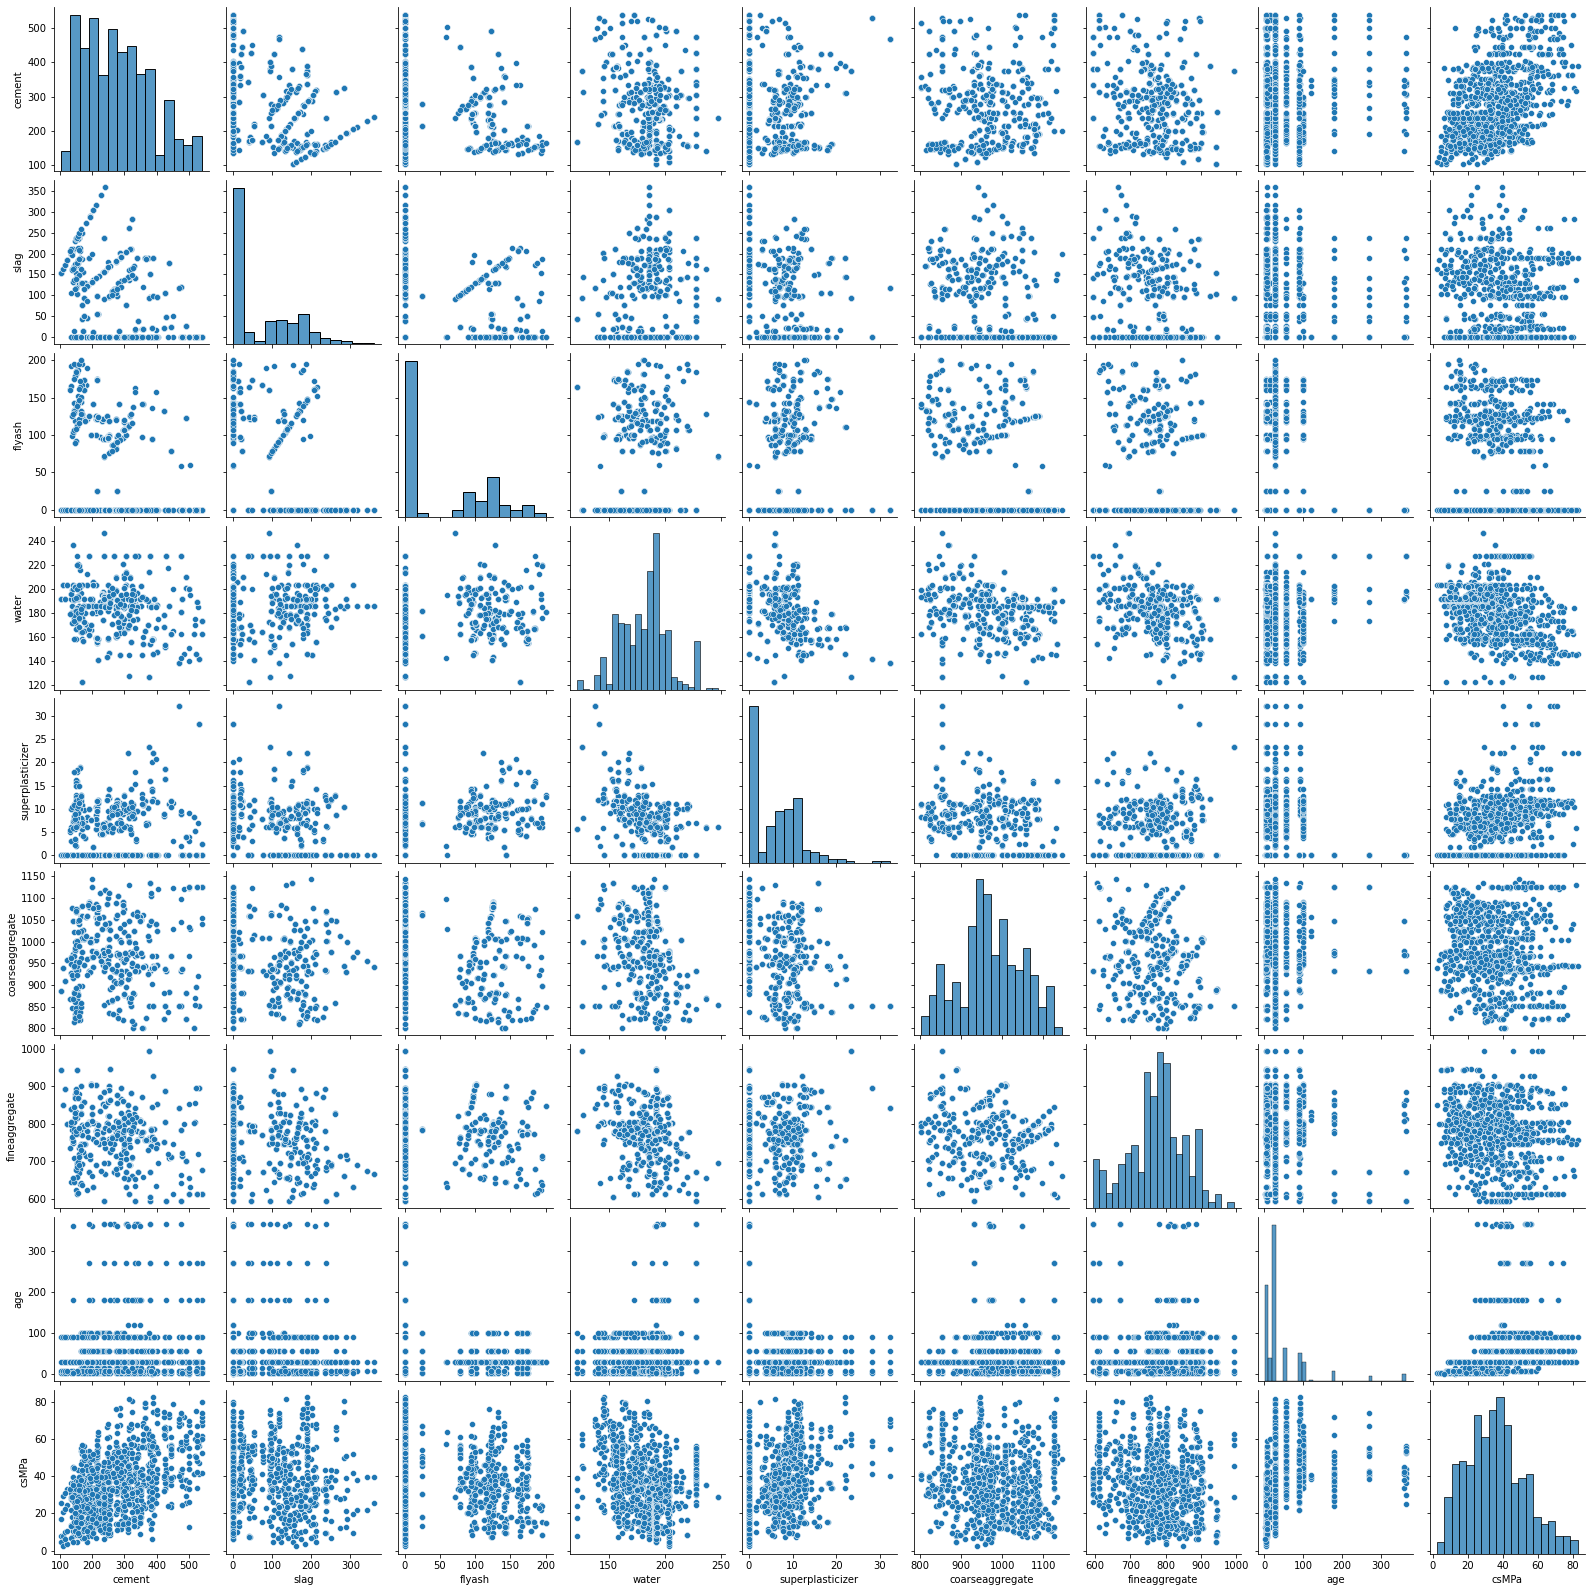

In [4]:
sns.pairplot(data)

### Divide Data between High and Low Strength

In [6]:
data['strength'] = np.where(data['csMPa']>=44,'high','low')
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,high
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,high
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,low
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,low
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,high


## Part 1: Data Visualization and Cleansing

### Summary Statistics

Generate summary information to [statistically describe the data](https://apmonitor.com/pds/index.php/Main/StatisticsMath).

In [7]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
profile = ProfileReport(data, explorative=True, minimal=True)
profile.to_widgets()

Check for balanced classification dataset ('high' and 'low' strength should have about equal amounts)

In [10]:
data['strength'].value_counts()

low     736
high    294
Name: strength, dtype: int64

<BarContainer object of 2 artists>

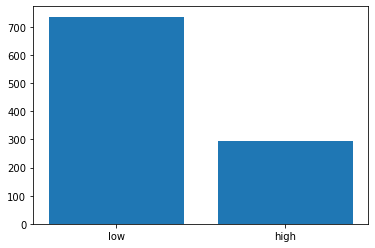

In [11]:
plt.bar(x=['low','high'],height=data['strength'].value_counts())

### Convert String Categories (Text) to Binary (0 or 1)

One-hot encoding translates character labels into a binary representation (0 or 1) for classification. Investigate the data types with `data.dtypes`.

In [12]:
data.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
strength             object
dtype: object

In [13]:
data.strength = [1 if x=='high' else 0 for x in data.strength]
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1


### Data Cleansing

There is one row that contains an outlier. Identify the outlier with boxplots.

cement                 AxesSubplot(0.125,0.536818;0.133621x0.343182)
slag                AxesSubplot(0.285345,0.536818;0.133621x0.343182)
flyash               AxesSubplot(0.44569,0.536818;0.133621x0.343182)
water               AxesSubplot(0.606034,0.536818;0.133621x0.343182)
superplasticizer    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
coarseaggregate           AxesSubplot(0.125,0.125;0.133621x0.343182)
fineaggregate          AxesSubplot(0.285345,0.125;0.133621x0.343182)
age                     AxesSubplot(0.44569,0.125;0.133621x0.343182)
csMPa                  AxesSubplot(0.606034,0.125;0.133621x0.343182)
strength               AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

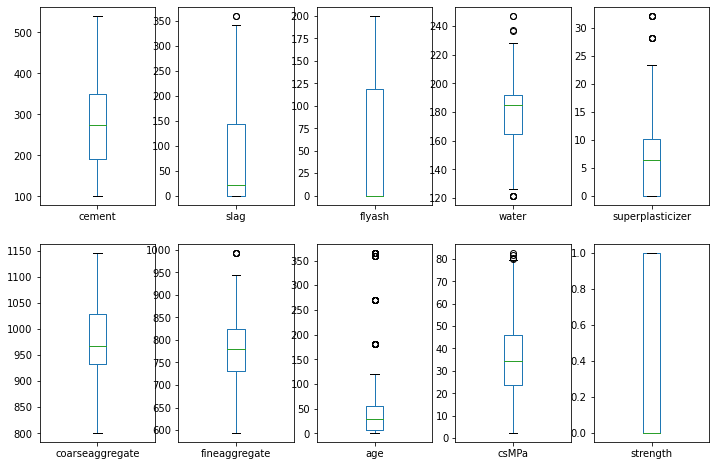

In [17]:
data.plot(kind='box',subplots=True,layout=(2,5),figsize=(12,8))

View outliers

In [20]:
outliers= data.loc[(data['fineaggregate']>950) | (data['slag']>350)]
outliers

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,strength
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.00,0
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.70,1
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.70,1
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.20,1
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.50,1
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42,0
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44,0


Remove rows that contain outliers. 

In [21]:
data = data.loc[(data['fineaggregate']<950) & (data['slag']<350)]
len(data)

1023

Verify that the outliers are removed with another box plot.

cement                 AxesSubplot(0.125,0.536818;0.133621x0.343182)
slag                AxesSubplot(0.285345,0.536818;0.133621x0.343182)
flyash               AxesSubplot(0.44569,0.536818;0.133621x0.343182)
water               AxesSubplot(0.606034,0.536818;0.133621x0.343182)
superplasticizer    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
coarseaggregate           AxesSubplot(0.125,0.125;0.133621x0.343182)
fineaggregate          AxesSubplot(0.285345,0.125;0.133621x0.343182)
age                     AxesSubplot(0.44569,0.125;0.133621x0.343182)
csMPa                  AxesSubplot(0.606034,0.125;0.133621x0.343182)
strength               AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

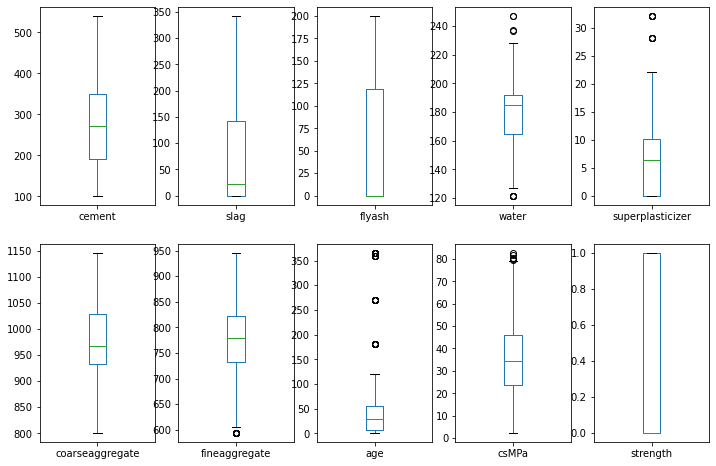

In [22]:
data.plot(kind='box',subplots=True,layout=(2,5),figsize=(12,8))

### Data Correlation

Generate a heat map of the data correlation.

<AxesSubplot:>

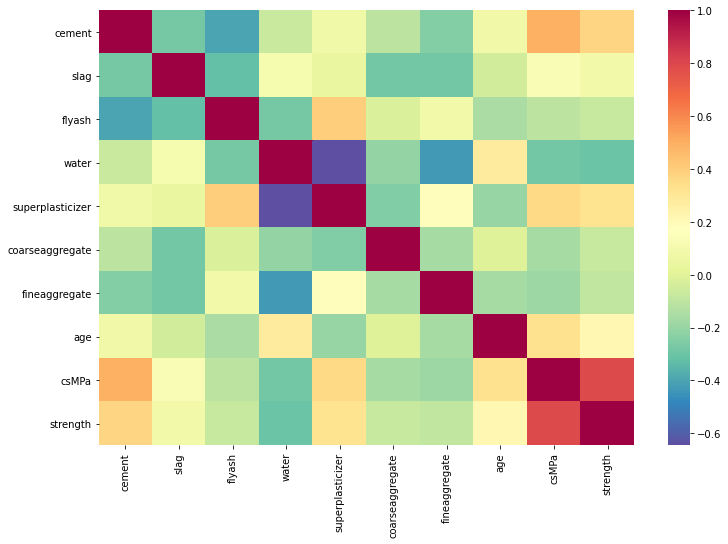

In [27]:
#data.corr()
plt.figure(figsize=(12,8))
ax = plt.gca()
sns.heatmap(data.corr(),cmap=cm.Spectral_r,ax=ax)

### Data Distributions and Pair Plot

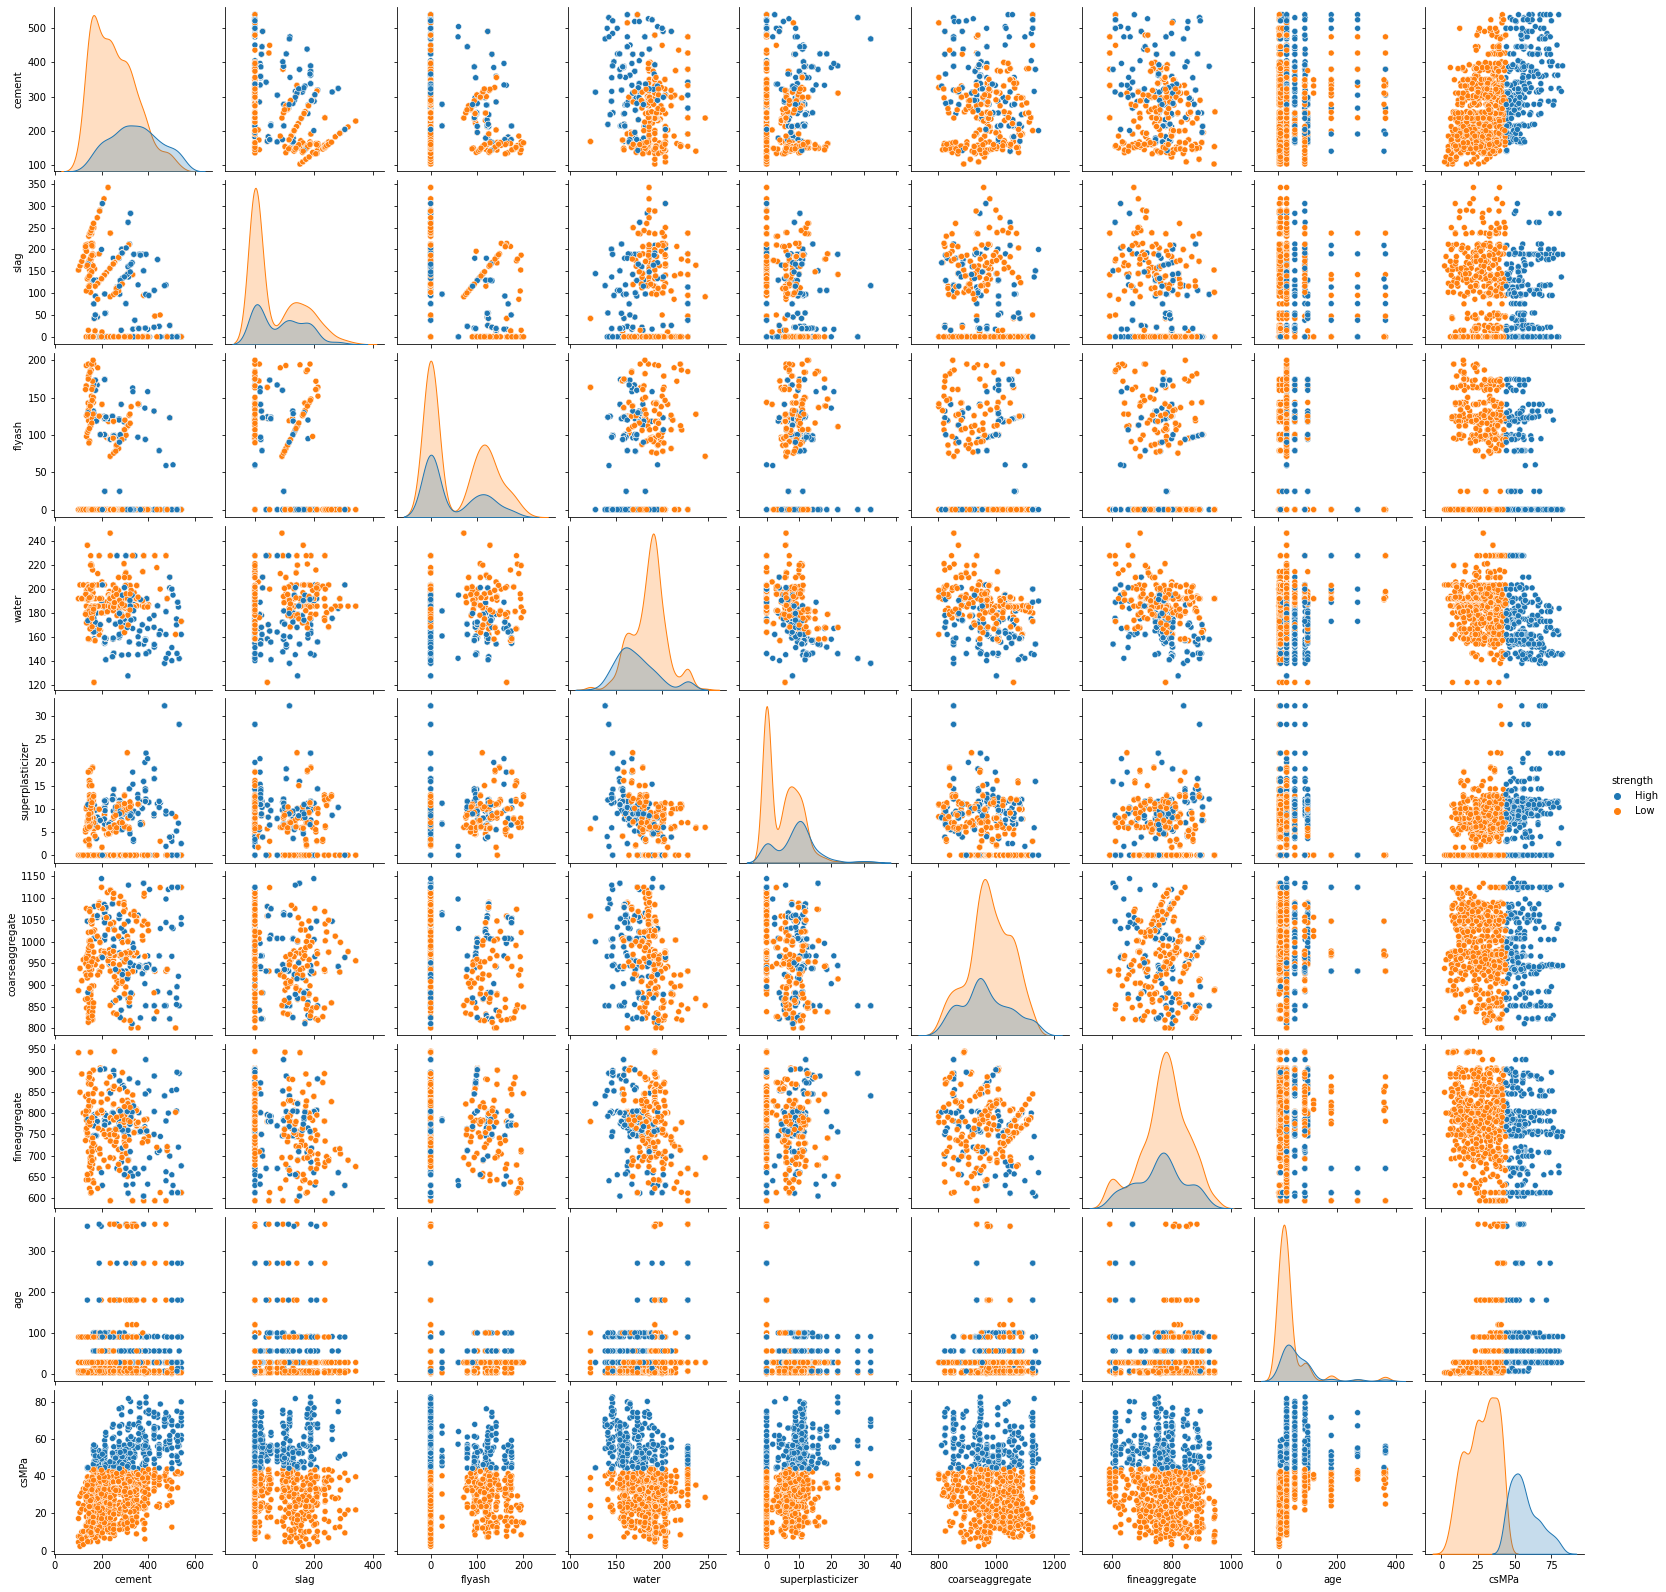

In [28]:
dpair = data.copy()
dpair['strength'] = np.where(dpair['strength']==1,'High','Low')
sns.pairplot(dpair,hue='strength')

## Part 2: Classification

Train and test a classifier to distinguish between high and low strength concrete. Test at least 8 classifiers of your choice. Recommend a best classifier among the 8 that are tested. 

### Divide Input Features (X) and Output Label (y)

Divide the data into sets that contain the input features (X) and output label (y=`csMPa`). Save data feature columns with `X_names=list(data.columns)` and remove `strength` with `X_names.remove('strength')` and remove `csMPa` with `X_names.remove('csMPa')`.

In [29]:
y_name = 'strength'
X_names = list(data.columns)
X_names.remove(y_name)
X_names.remove('csMPa')
print(X_names)

['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']


In [31]:
X = data[X_names].copy()
y = data[y_name].copy()

### Data scaling

Scale the input features with a `StandardScaler` or a `MinMaxScaler`. Why do classifiers return an error if the output label is scaled with `StandardScaler`?

In [34]:
s = StandardScaler()
Xs = s.fit_transform(X)
Xs = pd.DataFrame(Xs,columns=X.columns)
Xs.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,2.478337,-0.855688,-0.852132,-0.941192,-0.619644,0.857067,-1.227664,-0.280578
1,2.478337,-0.855688,-0.852132,-0.941192,-0.619644,1.050596,-1.227664,-0.280578
2,0.494401,0.809180,-0.852132,2.191706,-1.046073,-0.536342,-2.268448,3.542717
3,0.494401,0.809180,-0.852132,2.191706,-1.046073,-0.536342,-2.268448,5.043597
4,-0.785835,0.691178,-0.852132,0.482853,-1.046073,0.062308,0.669863,4.964603


Answer: The output label should not be scaled because it needs to be categorical data as an integer instead of a continuous real number.

### Train / Test Split

Randomly select values that split the data into a train (80%) and test (20%) set by using the sklearn `train_test_split` function with `shuffle=True`.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, shuffle=True, random_state=42)
print(len(X_train),len(X_test))

818 205


### Evaluate the Best Features

Use `SelectKBest` to evaluate the best features for the classifier.

<AxesSubplot:xlabel='Features'>

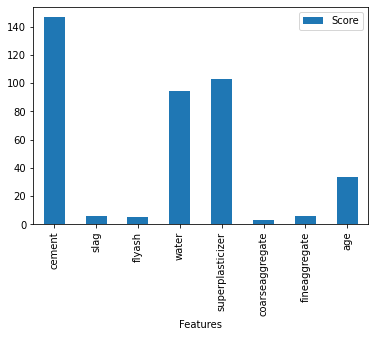

In [38]:
skb = SelectKBest(f_classif,k='all')
fit = skb.fit(X_train,y_train)
scores = pd.DataFrame({'Features':X_train.columns,'Score':fit.scores_})
scores = scores.set_index('Features',drop=True)
scores.plot(kind='bar')

In [39]:
scores

,Score
Features,
cement,146.591682
slag,6.096837
flyash,5.471682
water,94.330275
superplasticizer,102.696406
coarseaggregate,3.132258
fineaggregate,6.132877
age,33.445261


### Train (fit) and Test Classification with Logistic Regression 

C:\Users\johnh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


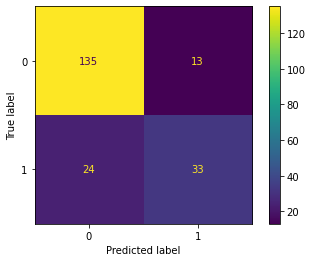

In [41]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
plot_confusion_matrix(lr,X_test,y_test)

### Train 8 Classifiers

Create 8 classifier objects and train.

In [42]:
nb=GaussianNB()
lr=LogisticRegression()
sgd=SGDClassifier()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rfm=RandomForestClassifier()
sv=SVC()
nn=MLPClassifier(max_iter=2000)

clsfrs = [[nb,'Naive Bayes'],
          [dt,'Decision Tree'],
          [knn,'K Nearest Neighbors'],
          [sv,'Support Vector Machine'],
          [lr,'Logistic Regression'],
          [sgd,'Stochastic Gradient Descent'],
          [rfm,'Random Forest Classifier'],
          [nn,'Neural Network']
         ]

for clf, name in clsfrs:
    clf.fit(X_train,y_train)

### Classifier Evaluation

Report the confusion matrix on the test set for each classifier. Discuss the performance of each. A confusion matrix shows correct classification (diagonals) and incorrect classification (off-diagonals) groups from the test set. Generate a confusion matrix for each classifier.

C:\Users\johnh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\johnh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\johnh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods:

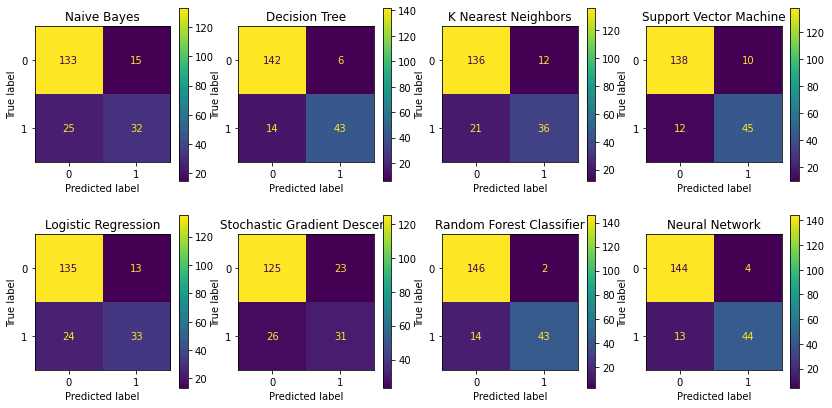

In [44]:
i = 0
plt.figure(figsize=(14,7))
for clf, name in clsfrs:
    i+=1
    ax = plt.subplot(2,4,i)
    plot_confusion_matrix(clf,X_test,y_test,ax=ax)
    plt.title(name)

## Part 3: Regression

Develop a regression model to predict Tension Strength (MPa). Compare predicted concrete strength with the regression model.

### Scale Data

Scale `data` with `StandardScaler` or `MinMaxScaler`. 

In [47]:
s = StandardScaler()
ds = s.fit_transform(data)
ds = pd.DataFrame(ds,columns=data.columns)
ds.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,strength
0,2.478337,-0.855688,-0.852132,-0.941192,-0.619644,0.857067,-1.227664,-0.280578,2.649684,1.589838
1,2.478337,-0.855688,-0.852132,-0.941192,-0.619644,1.050596,-1.227664,-0.280578,1.565583,1.589838
2,0.494401,0.809180,-0.852132,2.191706,-1.046073,-0.536342,-2.268448,3.542717,0.270650,-0.628995
3,0.494401,0.809180,-0.852132,2.191706,-1.046073,-0.536342,-2.268448,5.043597,0.317369,-0.628995
4,-0.785835,0.691178,-0.852132,0.482853,-1.046073,0.062308,0.669863,4.964603,0.512028,1.589838


### Select Input Features (X) and Output Label (y)

Using the 8 concrete properties as the input features.

- Cement: kg/m$^3$ mixture
- Blast Furnace Slag: kg/m$^3$ mixture
- Fly Ash: kg/m$^3$ mixture
- Water: kg/m$^3$ mixture
- Superplasticizer: kg/m$^3$ mixture
- Coarse Aggregate: kg/m$^3$ mixture
- Fine Aggregate: kg/m$^3$ mixture
- Age: Day (1~365)

The output label is the `csMPa`.

- Concrete Strength (MPa)

Divide the data into sets that contain the input features (X) and output label (y=`csMPa`). Save data feature columns with `X_names=list(data.columns)[0:8]`.

In [49]:
y_name = 'csMPa'
X_names = list(data.columns)[0:8]
Xs = ds[X_names].values
ys = ds[y_name].values

### Select Best Features for Regression

<AxesSubplot:xlabel='Features'>

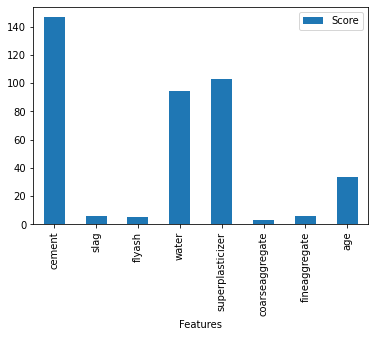

In [50]:
skb = SelectKBest(f_regression,k='all')
fit = skb.fit(X_train,y_train)
scores = pd.DataFrame({'Features':X_train.columns,'Score':fit.scores_})
scores = scores.set_index('Features',drop=True)
scores.plot(kind='bar')

### Split Data

Randomly select values that split the data into a train (80%) and test (20%) set.

In [52]:
X_train, X_test, y_train, y_test = \
   train_test_split(Xs, ys, test_size=0.20, \
                    shuffle=True, random_state=42)

### Regression Fit

Use 3 regression methods. Use Linear Regression, Neural Network (Deep Learning), and another regression method of your choice. Discuss the performance of each. Possible regression methods are:

- Linear Regression
- Neural Network (Deep Learning)
- K-Nearest Neighbors
- Support Vector Regressor

In [53]:
lin=LinearRegression()
sv=svm.SVR()
knn=KNeighborsRegressor(n_neighbors=2)
nn=MLPRegressor(hidden_layer_sizes=(3,5,3), tol=1e-6,
                  activation='tanh', solver='lbfgs',
                  early_stopping=True, max_iter=10000, n_iter_no_change = 20)

regress = [[lin,'Linear Regression'],
           [sv,'Support Vector Regressor'],
           [knn,'k-Nearest Neighbors'],
           [nn,'Neural Network']
         ]

for method, name in regress:
    method.fit(X_train,y_train)

### Validation

Report the correlation coefficient ($R^2$) for the train and test sets.

In [54]:
for method,name in regress:
    r2 = method.score(X_train,y_train)
    print(r2)

0.6301106865099024
0.8878971703791279
0.9264164505696022
0.908542594781876


In [55]:
for method,name in regress:
    r2 = method.score(X_test,y_test)
    print(r2)

0.54977851634022
0.8206968387062004
0.635195801365698
0.8535185011486818


### Parity Plot

A parity plot is a scatter plot with predicted versus measured. A parity plot of the training and test data is a good way to see the overall fit of tension strength.

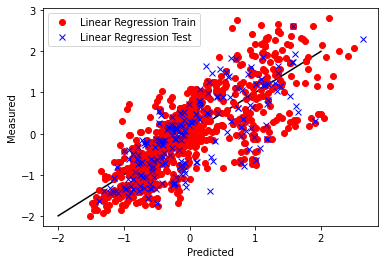

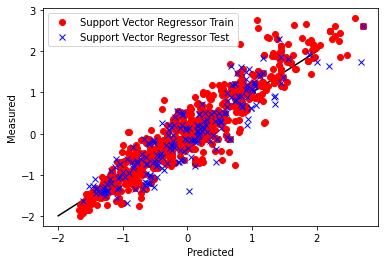

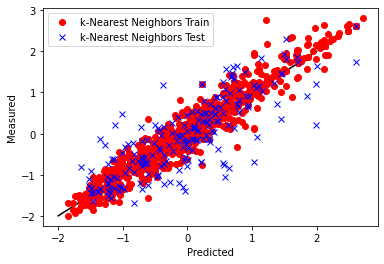

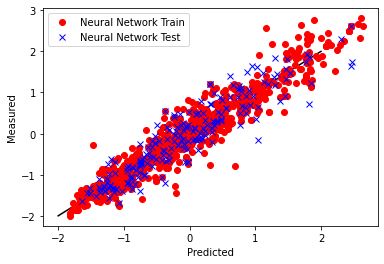

In [58]:
for method,name in regress:
    plt.figure()
    plt.plot([-2,2],[-2,2],'k-')
    plt.plot(method.predict(X_train),y_train,'ro',label=name+' Train')
    plt.plot(method.predict(X_test),y_test,'bx',label=name+' Test')
    plt.xlabel('Predicted')
    plt.ylabel('Measured')
    plt.legend()
    

A joint plot shows two variables, with the univariate and joint distributions.

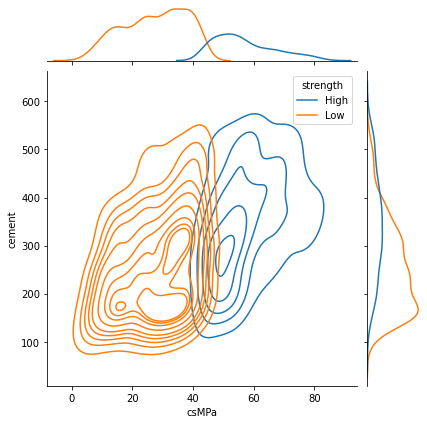

In [59]:
sns.jointplot(y='cement',x='csMPa',data=dpair,kind='kde',hue='strength')